## Analysis

The bar graph clearly shows that, among the different drug treatments, Capomulin was tested on the highest number of mice – a total of 230. Ramicane closely followed with 228 mice in the study. Interestingly, the study maintained a good balance between male and female mice, with 125 males and 124 females, indicating an equitable representation of genders.

When we dive into the statistics table and box plot, it's pretty clear that Capomulin and Ramicane treatments stood out as more effective compared to the other drugs that were tested.

One mouse, in particular, caught our attention – ID "s185," which was randomly selected for the Capomulin treatment. This mouse exhibited some very promising results, with a consistent decrease in total tumor volume throughout the study period.

Now, let's talk about the correlation between mouse weight and average tumor volume, which is a substantial 0.84. This means that as a mouse's weight increases, its average tumor volume tends to increase as well. It's a significant finding that adds depth to our understanding.

The regression analysis is like our crystal ball for future studies. It not only tells us that there's a positive relationship between mouse weight and average tumor volume but also quantifies how much the average tumor volume will change when the mouse weight changes. The fact that the model fits the data at 70% suggests its potential to make predictions in upcoming studies.

In a nutshell, based on the findings and analyses, it's safe to say that Capomulin has shown a pretty impressive performance as a drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipympl
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "module_5_starter_code\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = "module_5_starter_code\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_data["Mouse ID"].unique())
print(f"Number of mice in the study: {number_of_mice}")

Number of mice in the study: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicate_miceID}")

Duplicate Mice ID: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_rows = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint",])]
duplicate_mice_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
mice_count = len(combined_data["Mouse ID"].unique())
print(f"Number of mice in clean dataframe: {mice_count}")

Number of mice in clean dataframe: 249


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = combined_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = combined_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_stdev = combined_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_stdev

regimen_sem = combined_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

# Assemble the resulting series into a single summary dataframe.
summary_stats1 = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                               "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_stats1

C:\Users\ruchi\AppData\Local\Temp\ipykernel_4200\1623099445.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_mean = combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\ruchi\AppData\Local\Temp\ipykernel_4200\1623099445.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_median = combined_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\ruchi\AppData\Local\Temp\ipykernel_4200\1623099445.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either s

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = combined_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats2 = summary_stats2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_stats2

C:\Users\ruchi\AppData\Local\Temp\ipykernel_4200\238999716.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2 = combined_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

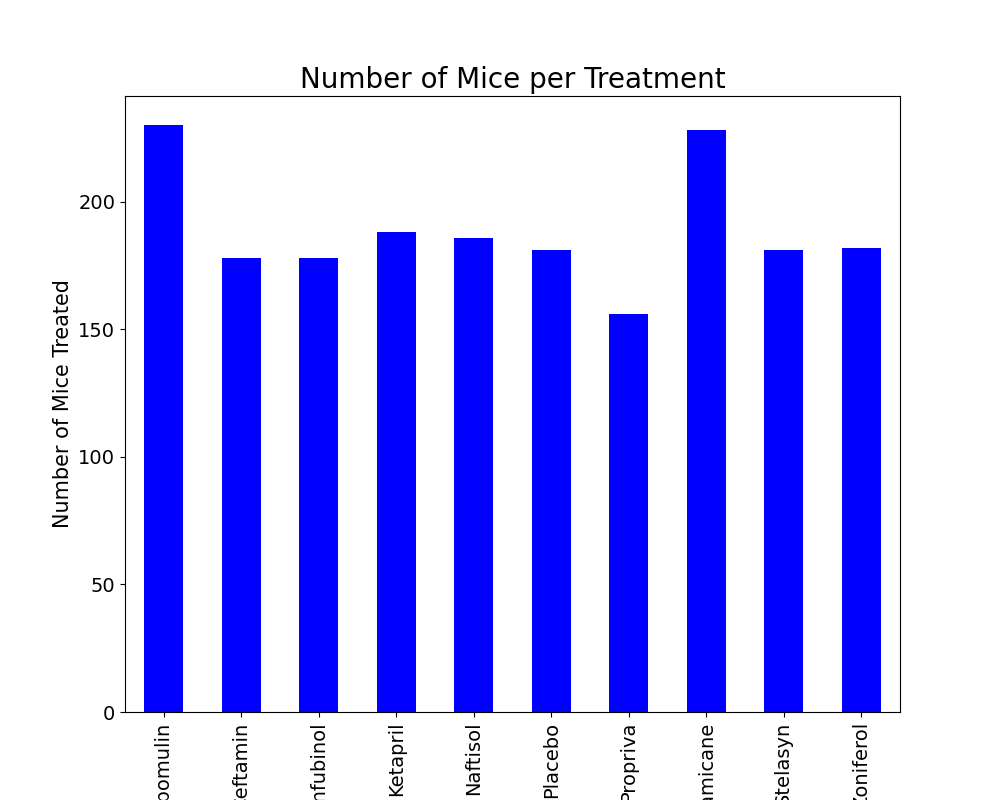

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_per_drug = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = mice_per_drug.plot(kind="bar", color='b', figsize=(10,8), fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

plt.show()
plt.tight_layout()

# mice_count
mice_per_drug

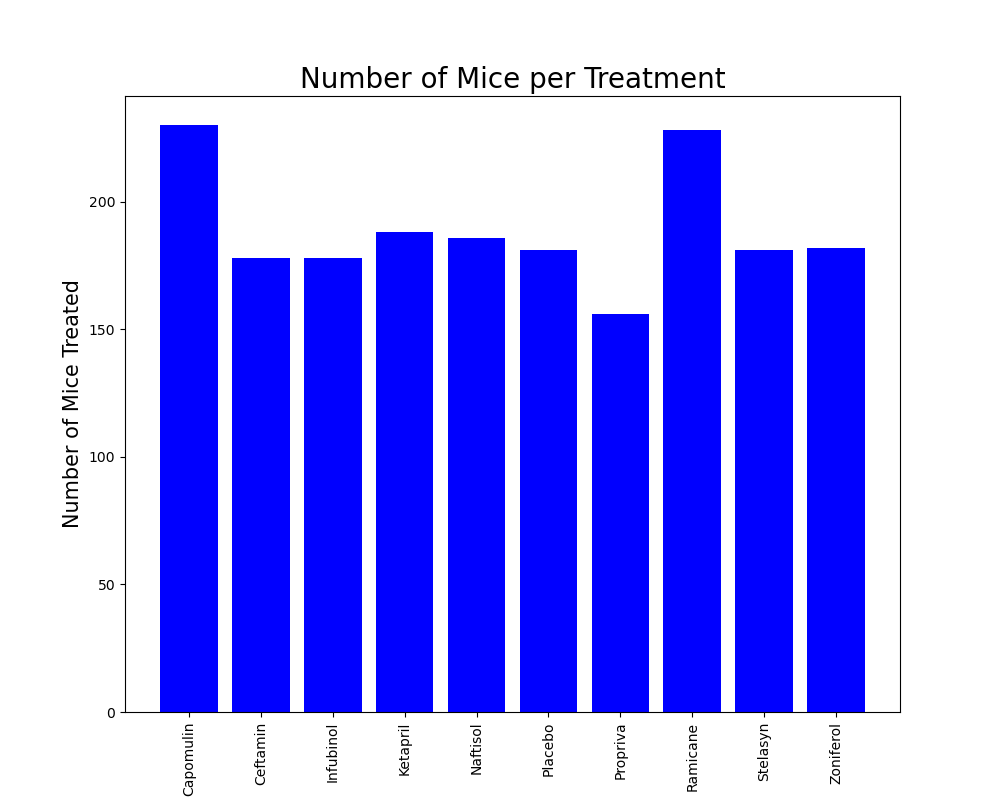

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Get y_axis values by creating a list of number of mice for each drug regimen
treatment_count = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
treatment_count

x_axis = np.arange(len(mice_per_drug))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.xticks(tick_locations, mice_per_drug.index.values, rotation="vertical")
plt.bar(x_axis, treatment_count, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)
plt.show()


treatment_count

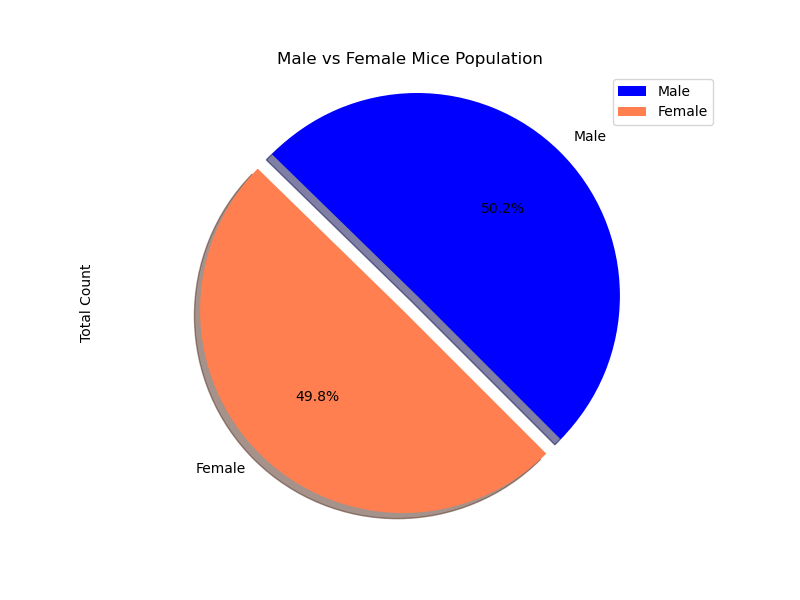

,Total Count
Male,125
Female,124


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Total count of mice based on gender
gender_rows = combined_data.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

# Create a dataframe for count and percentage of male and female mice
gender_data = pd.DataFrame({"Total Count": gender_count})

# Generate a pie plot showing the distribution of female versus male mice
colors = ["blue", "coral"]
explode = (0.1, 0)
pandas_pie = gender_data.plot(kind="pie", figsize=(8,6), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

gender_data

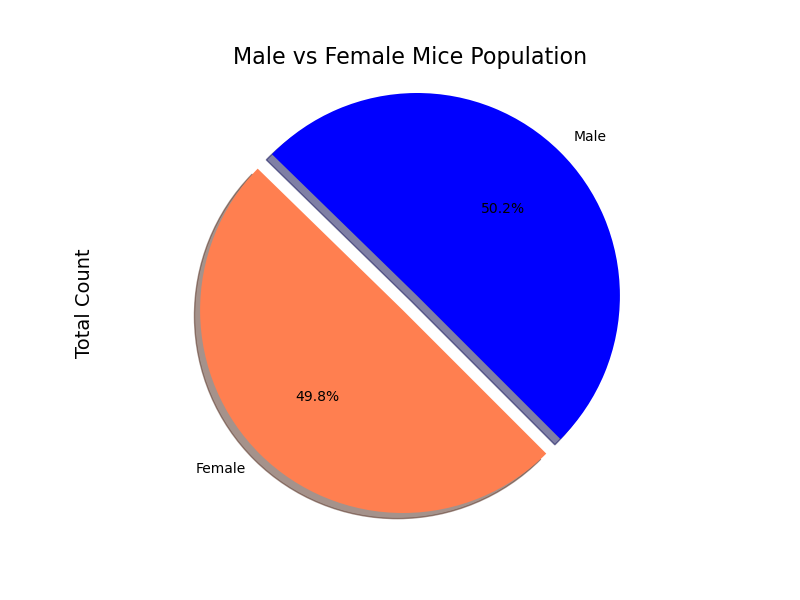

,Total Count
Male,125
Female,124


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Total count of mice based on gender
gender_rows = combined_data.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "coral"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.title("Male vs Female Mice Population",fontsize = 16)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(gender_count, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")

#Set equal axis
plt.axis("equal")

plt.show()

gender_data

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_lasttp = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data_lasttp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")
 

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


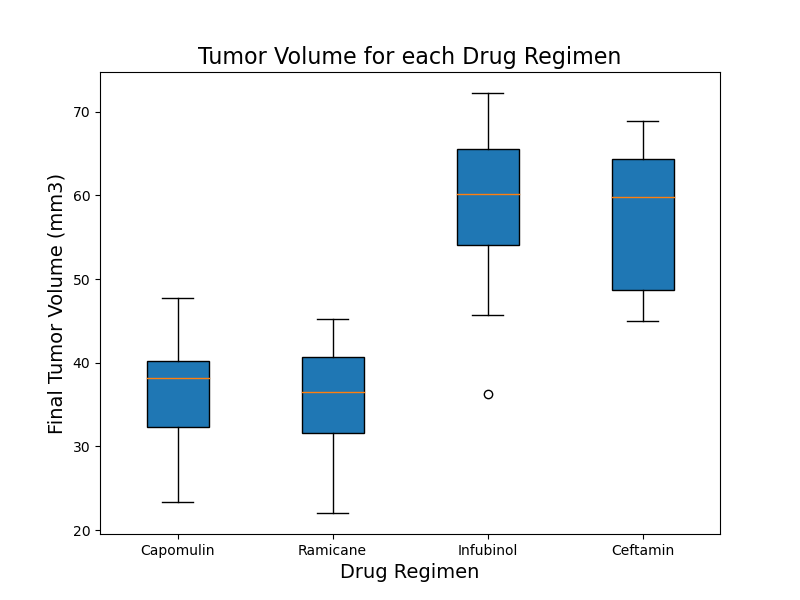

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

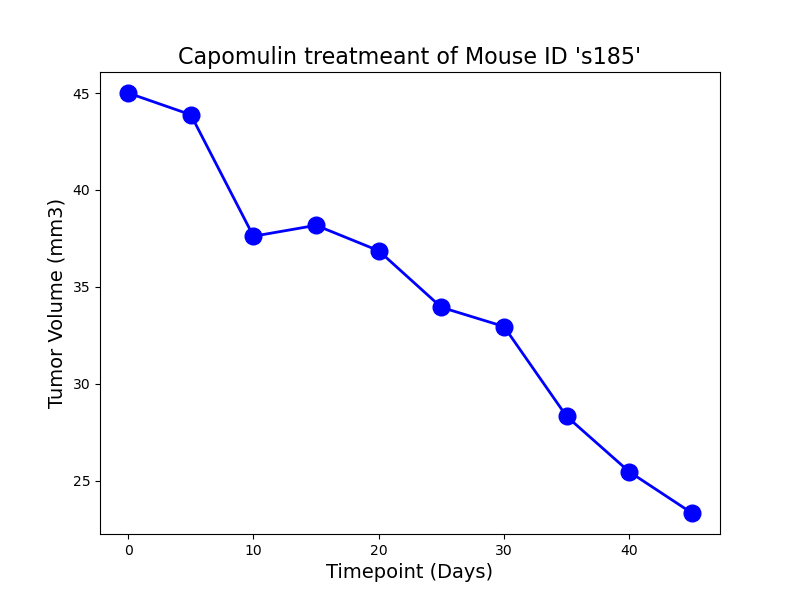

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
capomulin_df

# Get data for a specific mouse (e.g. Mouse ID = "s185")
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
mouce_in_capomulin

# Specify plot parameters
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_4200\2750148295.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()


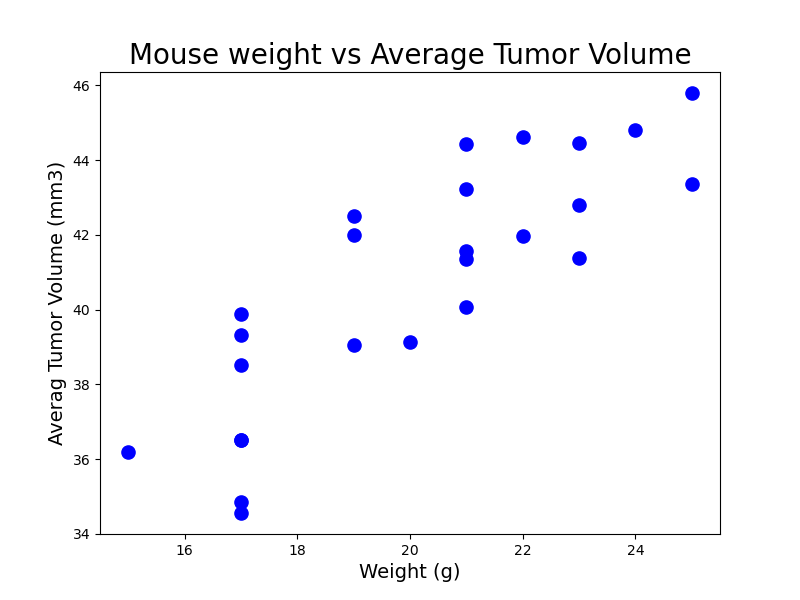

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(8, 6))
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)

plt.show()

avg_capom_df.head()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


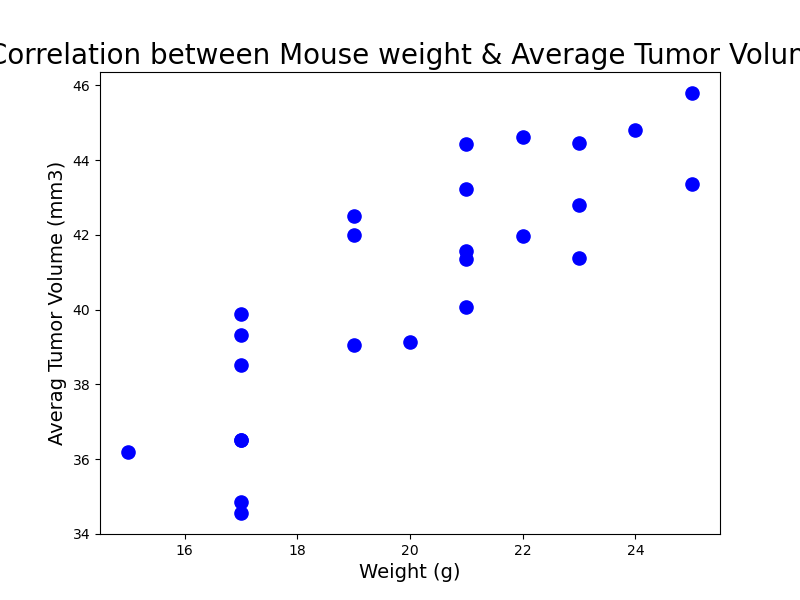

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)

plt.show()

y = 0.95x + 21.55


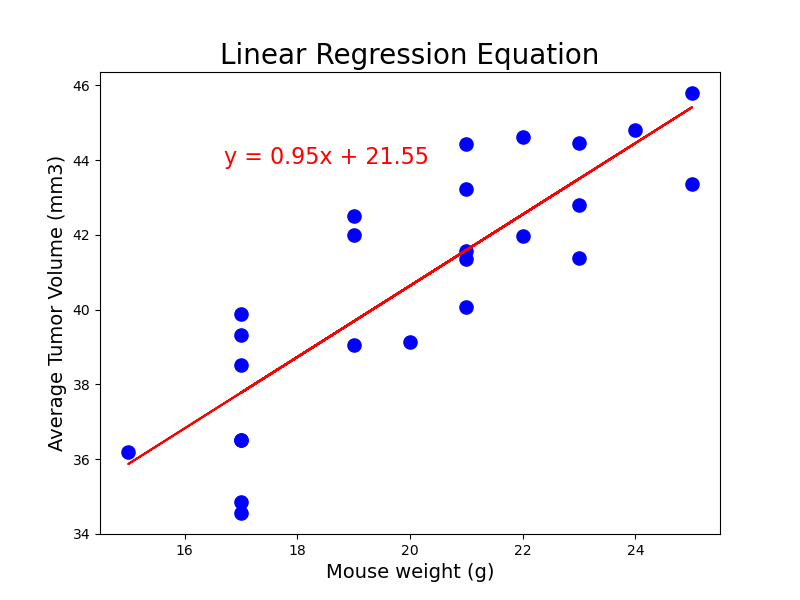

In [19]:
# Add the linear regression equation and line to the scatter plot
x_values = avg_capom_df['Weight (g)']
y_values = avg_capom_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")

plt.show()